<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Pandas Joins Lab

_Instructor: Aymeric Flaisler_
___


Very often we may need to do some data transformations to do some merging. For example, if we want to provide some information on events in a given area, we might have a dataset that looks like the following:

| Block | Event   |
|------|------|
|   1  | Block Party|
|   2  | Block Party|
|   1  | House Party|
|   1  | Open Bar|

In this example, we have multiple rows for Block (3 rows for Block 1 and 1 row for Block 2). If we wanted to join these to another table on the block keys, we'd be doing what's known as a 1 to many join. We will be revisiting that topic later.

Another option is to create some aggregate function (a count, a mean, a median, etc.) so that our data set has only one row per key. If we counted up the number of events in our toy dataset above, it might look like:

| Block | count(Event)   |
|------|------|
|   1  | 3|
|   2  | 1|
    
This sort of groupby aggregation allows us to join a larger dataset with a smaller, provided that we can summarize them using some sort of aggregate function.

# Your Mission, Should You Choose to Accept it

In this lab, you will take the role of an enterprising researcher, making use of the numerous free datasets available at the [City of Chicago Data Portal](https://data.cityofchicago.org/). You have a hunch that different types of reporting to 311, the City's information line, might be correlated with demographic characteristics of the 77 [community areas of Chicago](https://en.wikipedia.org/wiki/Community_areas_in_Chicago). You have downloaded some of this data in the following forms:

- **2008-2012-chi-census.csv** - A few selected Census outcomes from 2008-2012, aggregated by the Community Area
- **chicago_311_abandoned_vehicles.csv** - Calls to 311 for abandoned vehicles in 2008-2012
- **chicago_311_graffiti.csv** - Calls to 311 for graffiti removal in 2008-2012
- **chicago_311_vacant_abandoned_building.csv** - Calls to 311 about vacant or abandoned buildings in 2008-2012

Firing up your trusty laptop with Python, Numpy, and Pandas, you get to work. One way to join two of the datasets together, you realize, is with the following code:

```Python
census_data = pd.read_csv('2008-2012-chi-census.csv')
abandoned_vehicles = pd.read_csv('chicago_311_abandoned_vehicles.csv')

census_data.merge(abandoned_vehicles.groupby('Community Area').count(), 
        left_on='Community Area Number', 
        right_index=True, how='inner')
```

**Note:** We're doing a couple of things here that we haven't done before!

1. If our keys are named differently in each dataset, we can identify them by using **left_on** and **right_on** to point to the keys in the left and right dataset respectively
2. We are counting all the rows per **'Community Area'** in **abandoned_vehicles**. For the rest of this exercise, feel free to use that construction but, if you're interested in learning more, [df.groupby](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) contains the documentation for the **groupby** method in Pandas
3. We can also merge on the index of a dataframe, using **left_index=True** (if we want to join on the left dataset's index) or **right_index=True** (if we want to join on the right dataset's index).

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

### 1. Load each csv into Python and take a few minutes to explore each. What sort of data does it provide?

In [33]:
census = pd.read_csv('../datasets/2008-2012-chi-census.csv')
vehicles = pd.read_csv('../datasets/chicago_311_abandoned_vehicles.csv')
graffiti = pd.read_csv('../datasets/chicago_311_graffiti.csv')
buildings = pd.read_csv('../datasets/chicago_311_vacant_abandoned_building.csv')

In [34]:
# census.head()

In [35]:
# vehicles.head()

In [36]:
# graffiti.head()

In [37]:
# buildings.head()

### 2. Join each of the 311 calls datasets (modifying the code above) to get a count of each type of call per Community Area

In [22]:
census.columns

Index([u'Community Area Number', u'Community Area Name',
       u'Percent Housing Crowded', u'Percent Households Below Poverty',
       u'Percent Aged 16+ Unemployed', u'Percent Aged 25+ Without HS Diploma',
       u'Percent Aged Under 18 or Over 64', u'Per Capita Income',
       u'Hardship Index'],
      dtype='object')

In [23]:
vehicles.columns

Index([u'Creation Date', u'Status', u'Completion Date',
       u'Service Request Number', u'Type of Service Request', u'License Plate',
       u'Vehicle Make/Model', u'Vehicle Color', u'Current Activity',
       u'Most Recent Action',
       u'How Many Days Has the Vehicle Been Reported as Parked?',
       u'Street Address', u'ZIP Code', u'X Coordinate', u'Y Coordinate',
       u'Ward', u'Police District', u'Community Area', u'SSA', u'Latitude',
       u'Longitude', u'Location'],
      dtype='object')

In [24]:
graffiti.columns

Index([u'Creation Date', u'Status', u'Completion Date',
       u'Service Request Number', u'Type of Service Request',
       u'What Type of Surface is the Graffiti on?',
       u'Where is the Graffiti located?', u'Street Address', u'ZIP Code',
       u'X Coordinate', u'Y Coordinate', u'Ward', u'Police District',
       u'Community Area', u'SSA', u'Latitude', u'Longitude', u'Location'],
      dtype='object')

In [25]:
buildings.columns

Index([u'SERVICE REQUEST TYPE', u'SERVICE REQUEST NUMBER',
       u'DATE SERVICE REQUEST WAS RECEIVED',
       u'LOCATION OF BUILDING ON THE LOT (IF GARAGE, CHANGE TYPE CODE TO BGD).',
       u'IS THE BUILDING DANGEROUS OR HAZARDOUS?',
       u'IS BUILDING OPEN OR BOARDED?',
       u'IF THE BUILDING IS OPEN, WHERE IS THE ENTRY POINT?',
       u'IS THE BUILDING CURRENTLY VACANT OR OCCUPIED?',
       u'IS THE BUILDING VACANT DUE TO FIRE?',
       u'ANY PEOPLE USING PROPERTY? (HOMELESS, CHILDEN, GANGS)',
       u'ADDRESS STREET NUMBER', u'ADDRESS STREET DIRECTION',
       u'ADDRESS STREET NAME', u'ADDRESS STREET SUFFIX', u'ZIP CODE',
       u'X COORDINATE', u'Y COORDINATE', u'Ward', u'Police District',
       u'Community Area', u'LATITUDE', u'LONGITUDE', u'Location'],
      dtype='object')

In [46]:
vehicles_call_counts = vehicles.groupby('Community Area', as_index=True)[['Type of Service Request']].count()
vehicles_call_counts.rename(columns={'Type of Service Request': 'call_counts_vehicle'}, inplace=True)

In [49]:
vehicles_call_counts.head()

,call_counts_vehicle
Community Area,
0.0,63
1.0,778
2.0,1217
3.0,442
4.0,751


In [41]:
graffiti_call_counts = graffiti.groupby('Community Area')[['Type of Service Request']].count()
graffiti_call_counts.rename(columns={'Type of Service Request': 'call_counts_graffiti'}, inplace=True)

In [42]:
building_call_counts = buildings.groupby('Community Area')[['SERVICE REQUEST TYPE']].count()
building_call_counts.rename(columns={'SERVICE REQUEST TYPE': 'call_counts_building'}, inplace=True)

In [43]:
# More censes data can be included if we want
community_names = census.loc[:,['Community Area Name', 'Community Area Number', 'Hardship Index']]

In [31]:
community_names = community_names.merge(vehicles_call_counts, left_on='Community Area Number', right_index=True, how='left')
community_names = community_names.merge(graffiti_call_counts, left_on='Community Area Number', right_index=True, how='left')
community_names = community_names.merge(building_call_counts, left_on='Community Area Number', right_index=True, how='left')

In [32]:
community_names.head()

,Community Area Name,Community Area Number,Hardship Index,call_counts_vehicle,call_counts_graffiti,call_counts_building
0,Rogers Park,1.0,39.0,778.0,5009.0,51.0
1,West Ridge,2.0,46.0,1217.0,4353.0,139.0
2,Uptown,3.0,20.0,442.0,4129.0,79.0
3,Lincoln Square,4.0,17.0,751.0,3969.0,91.0
4,North Center,5.0,6.0,675.0,4606.0,105.0


### 3. What sort of trends can you identify? How would you do so (via plotting, analysis, etc.)?

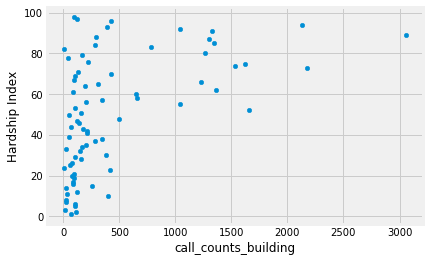

In [16]:
community_names.plot.scatter(x='call_counts_building', y='Hardship Index')

### 4. What sorts of questions would you want to use this data to answer?

In [17]:
# You may want to see if any of the census information is associated with 311 calls, perhaps the hardship index and graffiti removal calls.
# Explore the locations of abandoned buildings over time and see if there is a pattern
# See what kind of vehicles are most likely to be abandoned in Chicago